In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import string

from googletrans import Translator

import warnings
warnings.filterwarnings('ignore')

# Section 1: Data Cleaning

In [2]:
def create_data(data, delimiter = ';'):
    
    # loading data from .csv file
    df = pd.read_csv(data, delimiter=delimiter)
    
    # creating a translator object
    translator = Translator()
    
    # translating the column names in our dataframe from German to English
    df.columns = [translator.translate(col, dest='en').text for col in df.columns]
    
    return df

In [3]:
'''

loading the data from our .csv files and translating all the column names

'''
data_bremen = create_data('Bremen.csv')
data_hamburg = create_data('Hamburg.csv')
data_LSaxony = create_data('LSaxony.csv')
data_MV = create_data('MV.csv')
data_SH = create_data('SH.csv')

In [4]:
def replace_comma(value):
    
    # replacing ',' with '.' in our strings
    data = str.replace(value, ',', '.')
    
    return data

In [5]:
def convert_column(data, col):
    
    # lambda function to apply replace comma to all rows of our columns
    data[col] = data[col].apply(lambda x: replace_comma(x))
    # convert datatype from object to float
    data[col] = data[col].astype(float)
    
    return data

In [6]:
def check_column(data, columns):
    
    # removing empty rows from our dataframe based on selected columns
    data.dropna(subset = columns, axis = 0, inplace = True)
    
    return data

In [7]:
'''

checking the respective columns for empty values so that we can convert the values later

'''

columns = ['Gross performance of the unit', 'Net output of the unit']

data_bremen = check_column(data_bremen, columns)
data_hamburg = check_column(data_hamburg, columns)
data_LSaxony = check_column(data_LSaxony, columns)
data_MV = check_column(data_MV, columns)
data_SH = check_column(data_SH, columns)

In [8]:
# converting datatype of bremen columns from object to float
data_bremen = convert_column(data_bremen, 'Gross performance of the unit')
data_bremen = convert_column(data_bremen, 'Net output of the unit')

# converting datatype of hamburg columns from object to float
data_hamburg = convert_column(data_hamburg, 'Gross performance of the unit')
data_hamburg = convert_column(data_hamburg, 'Net output of the unit')

# converting datatype of LSaxony columns from object to float
data_LSaxony = convert_column(data_LSaxony, 'Gross performance of the unit')
data_LSaxony = convert_column(data_LSaxony, 'Net output of the unit')

# converting datatype of MV columns from object to float
data_MV = convert_column(data_MV, 'Gross performance of the unit')
data_MV = convert_column(data_MV, 'Net output of the unit')

# converting datatype of SH columns from object to float
data_SH = convert_column(data_SH, 'Gross performance of the unit')
data_SH = convert_column(data_SH, 'Net output of the unit')

In [9]:
def change_column_name(data, col_dict):
    
    # renaming specific column names based on our mapping dictionary
    data.rename(columns = col_dict, inplace = True)
    
    return data

In [10]:
'''

changing column names for 'Coordinate: Breitengrade (WGS84)', 'Coordinate: Long -range (WGS84)' 
to 'latitude' and 'longitude'

'''

col_dict = {'Coordinate: Breitengrade (WGS84)': 'Latitude', 'Coordinate: Long -range (WGS84)': 'Longitude' }

data_bremen = change_column_name(data_bremen, col_dict)
data_hamburg = change_column_name(data_hamburg, col_dict)
data_LSaxony = change_column_name(data_LSaxony, col_dict)
data_MV = change_column_name(data_MV, col_dict)
data_SH = change_column_name(data_SH, col_dict)

In [11]:
energy = data_bremen['Energy source'].unique().tolist()
energy

['Solare Strahlungsenergie',
 'Steinkohle',
 'Speicher',
 'Erdgas',
 'Wind',
 'Mineralölprodukte',
 'Wasser',
 'Biomasse',
 'andere Gase',
 'nicht biogener Abfall',
 'Wärme']

In [12]:
energy_map = {'Solare Strahlungsenergie': 'Solar Radiant Energy',
 'Steinkohle': 'Coal',
 'Speicher': 'Storage',
 'Erdgas': 'Natural Gas',
 'Wind': 'Wind Energy',
 'Mineralölprodukte': 'Petroleum Products',
 'Wasser': 'Water Energy',
 'Biomasse': 'Biomass Energy',
 'andere Gase': 'Other Gases',
 'nicht biogener Abfall': 'Non-Biogenic Waster',
 'Wärme': 'Warmth Energy',
 'Klärschlamm' : 'Sewage Sludge',
 'Druck aus Gasleitungen': 'Pressure from Gas lines',
 'Braunkohle': 'Brown Coal',
 'Grubengas': 'Mine Gas'}

In [13]:
def convert_energy(data, energy_map):
    
    # replacing values in energy source column based on our energy mapping dictionary DE -> EN
    data['Energy source'].replace(energy_map, inplace = True)
    
    return data

In [14]:
data_bremen = convert_energy(data_bremen, energy_map)
data_hamburg = convert_energy(data_hamburg, energy_map)
data_LSaxony = convert_energy(data_LSaxony, energy_map)
data_MV = convert_energy(data_MV, energy_map)
data_SH = convert_energy(data_SH, energy_map)

In [15]:
# data_bremen.to_csv('Cleaned Data/Bremen_Cleaned.csv', index = False)
# data_hamburg.to_csv('Cleaned Data/Hamburg_Cleaned.csv', index = False)
# data_LSaxony.to_csv('Cleaned Data/LowerSaxony_Cleaned.csv', index = False)
# data_MV.to_csv('Cleaned Data/MecklenburgVorpommen_Cleaned.csv', index = False)
# data_SH.to_csv('Cleaned Data/SchleswigHolstein_Cleaned.csv', index = False)

In [16]:
data = pd.concat([data_bremen, data_hamburg, data_LSaxony, data_SH, data_MV], axis = 0)
data.shape

(90862, 50)

In [17]:
data['Location of the unit'].unique()

array(['Bauliche Anlagen (Hausdach, Gebäude und Fassade)', nan,
       'Windkraft an Land', 'Bauliche Anlagen (Sonstige)', 'Freifläche',
       'Steckerfertige Erzeugungsanlage (sog. Plug-In- oder Balkon-PV-Anlage)',
       'Windkraft auf See'], dtype=object)

In [18]:
# extracting data for freeland solar installations from our combined dataset
freeland_data = data[data['Location of the unit'] == 'Freifläche']
freeland_data.shape

(1060, 50)

In [19]:
# extracting on-shore and off-shore wind plant installations from our combined dataset
wid_data = data[data['Location of the unit'] == 'Windkraft an Land']
wnd_data = data[data['Location of the unit'] == 'Windkraft auf See']
wind_data = pd.concat([wid_data, wnd_data], axis = 0)
wind_data.shape

(4973, 50)

# Section 2: Solar Data Analysis

In [20]:
data_north = create_data('fullSolarData.csv')

In [21]:
data_north.shape

(362424, 50)

In [22]:
data_north['Federal State'].unique()

array(['Niedersachsen', 'Mecklenburg-Vorpommern', 'Schleswig-Holstein',
       'Hamburg', 'Bremen', 'Bundesland'], dtype=object)

In [23]:
data_north = data_north[data_north['Federal State']!='Bundesland']
data_north.shape

(362408, 50)

In [24]:
columns = ['Gross performance of the unit', 'Net output of the unit']

data_north = check_column(data_north, columns)

In [25]:
data_north = convert_column(data_north, 'Gross performance of the unit')
data_north = convert_column(data_north, 'Net output of the unit')

In [26]:
data_north.dtypes

Mastr no.the unit                              object
Display name of the unit                       object
Company status                                 object
Energy source                                  object
Gross performance of the unit                 float64
Net output of the unit                        float64
Commissioning date of the unit                 object
Registration date of the unit                  object
Federal State                                  object
Postal code                                    object
Ort                                            object
Street                                         object
House number                                   object
Alcohol                                        object
Parade                                         object
Municipal key                                  object
Coordinate: Breitengrade (WGS84)               object
Coordinate: Long -range (WGS84)                object
Number of solar modules     

In [27]:
col_dict = {'Coordinate: Breitengrade (WGS84)': 'Latitude', 'Coordinate: Long -range (WGS84)': 'Longitude' }

data_north = change_column_name(data_north, col_dict)

In [28]:
energy_map = {'Solare Strahlungsenergie': 'Solar Radiant Energy'}
data_north = convert_energy(data_north, energy_map)

In [29]:
# data_north.to_csv('Cleaned Data/North_Cleaned.csv', index = False)

In [30]:
data_north['Location of the unit'].unique()

array(['Bauliche Anlagen (Hausdach, Gebäude und Fassade)',
       'Bauliche Anlagen (Sonstige)', 'Freifläche', nan,
       'Steckerfertige Erzeugungsanlage (sog. Plug-In- oder Balkon-PV-Anlage)',
       'Gewässer'], dtype=object)

In [31]:
freeland_data = data_north[data_north['Location of the unit'] == 'Freifläche']
freeland_data.shape

(2188, 50)

In [32]:
freeland_data['Energy source'].value_counts()

Solar Radiant Energy    2188
Name: Energy source, dtype: int64

In [33]:
freeland_data.columns

Index(['Mastr no.the unit', 'Display name of the unit', 'Company status',
       'Energy source', 'Gross performance of the unit',
       'Net output of the unit', 'Commissioning date of the unit',
       'Registration date of the unit', 'Federal State', 'Postal code', 'Ort',
       'Street', 'House number', 'Alcohol', 'Parade', 'Municipal key',
       'Latitude', 'Longitude', 'Number of solar modules',
       'Main direction of the solar modules', 'Name of the wind farm',
       'Hub height of the wind energy system',
       'Rotion diameter of the wind energy system',
       'Manufacturer of the wind energy system', 'Type designation',
       'Main fuel of the unit', 'Usable storage capacity in kWh',
       'Technology of electricity generation', 'Location of the unit',
       'last update', 'Date of final decommissioning',
       'Date of the planned commissioning',
       'Name of the plant operator (only org.)',
       'Mastr no.of the system operator', 'Full feed or partial feedb

## i) Solar Power Loss in North Germany

In [34]:
bg, hg, mvg, ng, shg = freeland_data.groupby("Federal State")['Gross performance of the unit'].sum()

In [35]:
bn, hn, mvn, nn, shn = freeland_data.groupby("Federal State")['Net output of the unit'].sum()

In [36]:
freeland_data.groupby("Federal State")['Net output of the unit'].sum()

Federal State
Bremen                        885.380
Hamburg                       915.830
Mecklenburg-Vorpommern    1667301.292
Niedersachsen              754623.601
Schleswig-Holstein         859189.845
Name: Net output of the unit, dtype: float64

In [37]:
freeland_data.groupby("Federal State")['Gross performance of the unit'].sum()

Federal State
Bremen                        933.025
Hamburg                      1032.190
Mecklenburg-Vorpommern    1923863.699
Niedersachsen              848254.367
Schleswig-Holstein         947077.327
Name: Gross performance of the unit, dtype: float64

In [38]:
power_loss_bremen = ((bg - bn) / bg) * 100
power_loss_hamburg = ((hg - hn) / hg) * 100
power_loss_mv = ((mvg - mvn) / mvg) * 100
power_loss_n = ((ng - nn) / ng) * 100
power_loss_sh = ((shg - shn) / shg) * 100

print('Power loss in respective states: ')
print(f'Bremen: {power_loss_bremen}')
print(f'Hamburg: {power_loss_hamburg}')
print(f'Mecklenburg Vorpommern: {power_loss_mv}')
print(f'Niedersachen: {power_loss_n}')
print(f'Schleswig-Holstein: {power_loss_sh}')

Power loss in respective states: 
Bremen: 5.1065084000964704
Hamburg: 11.273118321239307
Mecklenburg Vorpommern: 13.335789179522333
Niedersachen: 11.038052928762577
Schleswig-Holstein: 9.279863374873091


In [39]:
power_loss = {'Federal State': ['Bremen', 'Hamburg', 'Mecklenburg Vorpommern', 'Niedersachen', 'Schleswig-Holstein'],
              'Percentage of solar power loss': [5.11, 11.27, 13.34, 11.04, 9.28]}
power_loss_data = pd.DataFrame(data = power_loss)
power_loss_data.head()

Federal State  Percentage of solar power loss
0                  Bremen                            5.11
1                 Hamburg                           11.27
2  Mecklenburg Vorpommern                           13.34
3            Niedersachen                           11.04
4      Schleswig-Holstein                            9.28

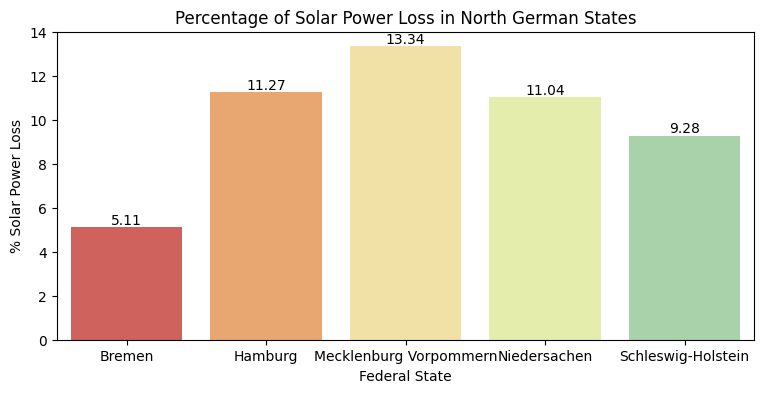

In [40]:
colors = sns.color_palette('Spectral')[0:10]
plt.figure(figsize=(9, 4))
ax = sns.barplot(data = power_loss_data, x = 'Federal State', y = 'Percentage of solar power loss', palette = colors)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation = 0)
plt.xlabel('Federal State', fontsize = 10)
plt.ylabel('% Solar Power Loss', fontsize = 10)
plt.title('Percentage of Solar Power Loss in North German States', fontsize = 12)
# plt.savefig('Solar Power Loss in States', pad_inches = 0.1)
plt.show()

## ii) Distribution of Solar Panel Orientations

In [41]:
freeland_data['Main direction of the solar modules'].unique()

array(['Süd-West', 'Süd', 'Süd-Ost', 'nachgeführt', 'Ost', nan, 'West',
       'Ost-West', 'Nord-Ost', 'Nord', 'Nord-West'], dtype=object)

In [42]:
freeland_data['Main direction of the solar modules'].isna().sum()

32

In [43]:
freeland_data.shape

(2188, 50)

In [44]:
freeland_data.dropna(subset = ['Main direction of the solar modules'], axis = 0, inplace = True)

In [45]:
freeland_data.shape

(2156, 50)

In [46]:
# creating a copy of our freeland_data
solar_orientation_data = freeland_data.copy()
solar_orientation_data.shape

(2156, 50)

In [47]:
col_dict = {'Süd-West': 'South-West',
            'Süd': 'South',
            'Süd-Ost': 'South-East',
            'nachgeführt': 'Tracked',
            'Ost': 'East',
            'West': 'West',
            'Ost-West': 'East-West',
            'Nord-Ost': 'North-East',
            'Nord': 'North',
            'Nord-West': 'North-West'}

solar_orientation_data['Main direction of the solar modules'].replace(col_dict, inplace = True)

In [48]:
labels = ['South', 'South-West', 'South-East', 'Tracked', 'East-West', 'North', 'West']
values = [1767, 182, 75, 45, 39, 23, 14]
explode = (0.05, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02)

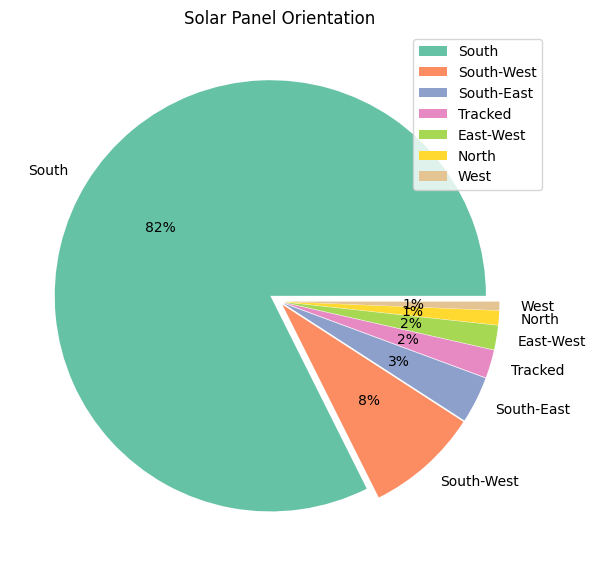

In [49]:
colors = sns.color_palette('Set2')[0:10]
plt.figure(figsize=(7, 7))
plt.pie(values, explode = explode, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend(loc = 'upper right', labels = labels)
plt.title('Solar Panel Orientation')
# plt.savefig('Pie Chart', pad_inches = 0.1)
plt.show()

In [50]:
# wind_data.to_csv('Cleaned Data/Wind_Cleaned.csv', index = False)

## iii) Solar Power Loss due to Panel Orientation

In [51]:
e, e_w, n, n_e, n_w, s, s_e, s_w, t, w = solar_orientation_data.groupby('Main direction of the solar modules')['Gross performance of the unit'].sum()

In [52]:
en, e_wn, nn, n_en, n_wn, sn, s_en, s_wn, tn, wn = solar_orientation_data.groupby('Main direction of the solar modules')['Net output of the unit'].sum()

In [53]:
pl_e = ((e - en) / e) * 100
pl_ew = ((e_w - e_wn) / e_w) * 100
pl_n = ((n - nn) / n) * 100
pl_ne = ((n_e - n_en) / n_e) * 100
pl_nw = ((n_w - n_wn) / n_w) * 100
pl_s = ((s - sn) / s) * 100
pl_se = ((s_e - s_en) / s_e) * 100
pl_sw = ((s_w - s_wn) / s_w) * 100
pl_t = ((t - tn) / t) * 100
pl_w = ((w - wn) / w) * 100

print('Power loss based on Solar Panel Orientation: ')
print(f'East: {pl_e}')
print(f'East-West: {pl_ew}')
print(f'North: {pl_n}')
print(f'North-East: {pl_ne}')
print(f'North-West: {pl_nw}')
print(f'South: {pl_s}')
print(f'South-East: {pl_se}')
print(f'South-West: {pl_sw}')
print(f'Tracked: {pl_t}')
print(f'West: {pl_w}')

Power loss based on Solar Panel Orientation: 
East: 16.231373240126086
East-West: 14.041394247399595
North: 16.084410572641026
North-East: 15.378955114054454
North-West: 17.873903285043866
South: 11.239893770682679
South-East: 12.213506358234119
South-West: 10.83229637367791
Tracked: 16.817659080015783
West: 12.765585380781674


In [54]:
orientation_power_loss = {'Solar Panel Orientation': ['East', 'East-West', 'North', 'North-East', 'North-West', 
                                                     'South', 'South-East', 'South-West', 'Tracked', 'West'],
                          'Percentage of Power loss': [16.23, 14.04, 16.08, 15.38, 17.87, 
                                                       11.23, 12.21, 10.83, 16.82, 12.76]}

orientation_power_loss_data = pd.DataFrame(data = orientation_power_loss)
orientation_power_loss_data.head(10)

Solar Panel Orientation  Percentage of Power loss
0                    East                     16.23
1               East-West                     14.04
2                   North                     16.08
3              North-East                     15.38
4              North-West                     17.87
5                   South                     11.23
6              South-East                     12.21
7              South-West                     10.83
8                 Tracked                     16.82
9                    West                     12.76

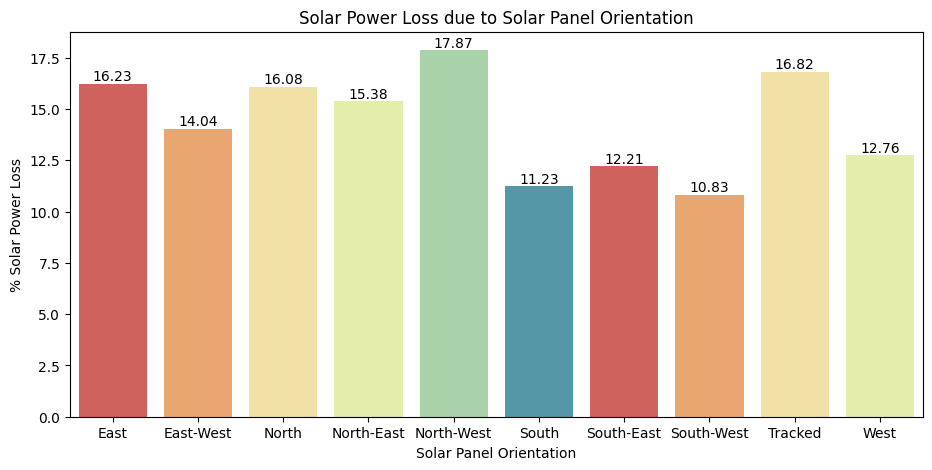

In [55]:
colors = sns.color_palette('Spectral')[0:10]
plt.figure(figsize=(11, 5))
ax = sns.barplot(data = orientation_power_loss_data, x = 'Solar Panel Orientation', y = 'Percentage of Power loss', palette = colors)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation = 0)
plt.xlabel('Solar Panel Orientation', fontsize = 10)
plt.ylabel('% Solar Power Loss', fontsize = 10)
plt.title('Solar Power Loss due to Solar Panel Orientation', fontsize = 12)
plt.savefig('Solar Power Loss based on Panel Orientation', pad_inches = 0.1)
plt.show()

# Section 3: Energy Source Analysis

In [56]:
b = pd.read_csv('Cleaned Data/Bremen_Cleaned.csv')
h = pd.read_csv('Cleaned Data/Hamburg_Cleaned.csv')
n = pd.read_csv('Cleaned Data/LowerSaxony_Cleaned.csv')
mv = pd.read_csv('Cleaned Data/MecklenburgVorpommen_Cleaned.csv')
sh = pd.read_csv('Cleaned Data/SchleswigHolstein_Cleaned.csv')

In [57]:
b['Energy source'].unique()

array(['Solar Radiant Energy', 'Coal', 'Storage', 'Natural Gas',
       'Wind Energy', 'Petroleum Products', 'Water Energy',
       'Biomass Energy', 'Other Gases', 'Non-Biogenic Waster',
       'Warmth Energy'], dtype=object)

In [58]:
h['Energy source'].unique()

array(['Solar Radiant Energy', 'Storage', 'Natural Gas', 'Biomass Energy',
       'Petroleum Products', 'Wind Energy', 'Other Gases',
       'Warmth Energy', 'Water Energy', 'Coal', 'Non-Biogenic Waster',
       'Sewage Sludge', 'Pressure from Gas lines'], dtype=object)

In [59]:
n['Energy source'].unique()

array(['Solar Radiant Energy', 'Natural Gas', 'Biomass Energy', 'Storage',
       'Petroleum Products', 'Wind Energy', 'Water Energy', 'Other Gases'],
      dtype=object)

In [60]:
mv['Energy source'].unique()

array(['Solar Radiant Energy', 'Petroleum Products', 'Natural Gas',
       'Storage', 'Wind Energy', 'Biomass Energy', 'Water Energy',
       'Sewage Sludge', 'Other Gases', 'Non-Biogenic Waster',
       'Warmth Energy', 'Coal'], dtype=object)

In [61]:
sh['Energy source'].unique()

array(['Solar Radiant Energy', 'Natural Gas', 'Wind Energy', 'Storage',
       'Biomass Energy', 'Other Gases', 'Petroleum Products',
       'Non-Biogenic Waster', 'Warmth Energy', 'Water Energy',
       'Sewage Sludge'], dtype=object)

In [62]:
b['Federal State'].unique()

array(['Bremen'], dtype=object)

In [63]:
h['Federal State'].unique()

array(['Hamburg'], dtype=object)

In [64]:
n['Federal State'].unique()

array(['Niedersachsen'], dtype=object)

In [65]:
mv['Federal State'].unique()

array(['Mecklenburg-Vorpommern'], dtype=object)

In [66]:
sh['Federal State'].unique()

array(['Schleswig-Holstein'], dtype=object)

## i) Energy Sources of North Germany

In [67]:
b.groupby("Energy source")['Gross performance of the unit'].sum().sort_values(ascending = False)

Energy source
Coal                    840000.000
Natural Gas             722681.541
Other Gases             246897.500
Wind Energy             201314.000
Non-Biogenic Waster     126400.000
Petroleum Products      111205.220
Solar Radiant Energy     71717.527
Storage                  22328.092
Biomass Energy           12559.700
Water Energy             10000.000
Warmth Energy               11.000
Name: Gross performance of the unit, dtype: float64

In [68]:
h.groupby("Energy source")['Gross performance of the unit'].sum().sort_values(ascending = False)

Energy source
Coal                       1892240.000
Natural Gas                 311704.874
Wind Energy                 118699.800
Petroleum Products          105557.000
Solar Radiant Energy         80785.857
Biomass Energy               47752.700
Non-Biogenic Waster          32924.000
Storage                      25668.650
Warmth Energy                 8324.000
Sewage Sludge                 5200.000
Water Energy                   120.000
Other Gases                     93.000
Pressure from Gas lines         30.000
Name: Gross performance of the unit, dtype: float64

In [69]:
n.groupby("Energy source")['Gross performance of the unit'].sum().sort_values(ascending = False)

Energy source
Wind Energy             2402286.800
Solar Radiant Energy     657493.860
Biomass Energy           529819.765
Natural Gas              138754.875
Petroleum Products        20927.100
Water Energy              17985.800
Storage                   15632.532
Other Gases                8481.300
Name: Gross performance of the unit, dtype: float64

In [70]:
mv.groupby("Energy source")['Gross performance of the unit'].sum().sort_values(ascending = False)

Energy source
Wind Energy             3768224.120
Solar Radiant Energy    2580366.603
Coal                     553000.000
Biomass Energy           405546.566
Natural Gas              382375.265
Storage                   56026.330
Non-Biogenic Waster       37780.000
Petroleum Products        20699.900
Other Gases                5616.600
Water Energy               2617.760
Sewage Sludge               770.000
Warmth Energy               162.700
Name: Gross performance of the unit, dtype: float64

In [71]:
sh.groupby("Energy source")['Gross performance of the unit'].sum().sort_values(ascending = False)

Energy source
Wind Energy             4481099.300
Solar Radiant Energy     849000.943
Natural Gas              412755.945
Biomass Energy           300161.700
Petroleum Products        58423.500
Storage                   56029.088
Non-Biogenic Waster       12500.000
Other Gases                4604.630
Water Energy               2313.500
Sewage Sludge                24.000
Warmth Energy                18.000
Name: Gross performance of the unit, dtype: float64

In [72]:
data = {'Federal State': ['Bremen', 'Bremen', 'Bremen',
                          'Hamburg', 'Hamburg', 'Hamburg',
                          'Niedersachsen', 'Niedersachsen', 'Niedersachsen',
                          'Mecklenburg-Vorpommern', 'Mecklenburg-Vorpommern', 'Mecklenburg-Vorpommern',
                          'Schleswig-Holstein', 'Schleswig-Holstein', 'Schleswig-Holstein'], 
        'Energy Source': ['Coal', 'Natural Gas', 'Other Gases',
                          'Coal', 'Natural Gas', 'Wind Energy',
                          'Wind Energy', 'Solar Energy', 'Biomass Energy',
                          'Wind Energy', 'Solar Energy', 'Coal',
                          'Wind Energy', 'Solar Energy', 'Natural Gas'],
        'Gross Power': [840000, 722682, 246898,
                        1892240, 311705, 118700,
                        2402287, 657494, 529820,
                        3768224, 2580367, 553000,
                        4481099, 849001, 412756]}

gross_power = pd.DataFrame(data = data)
gross_power.head()

Federal State Energy Source  Gross Power
0        Bremen          Coal       840000
1        Bremen   Natural Gas       722682
2        Bremen   Other Gases       246898
3       Hamburg          Coal      1892240
4       Hamburg   Natural Gas       311705

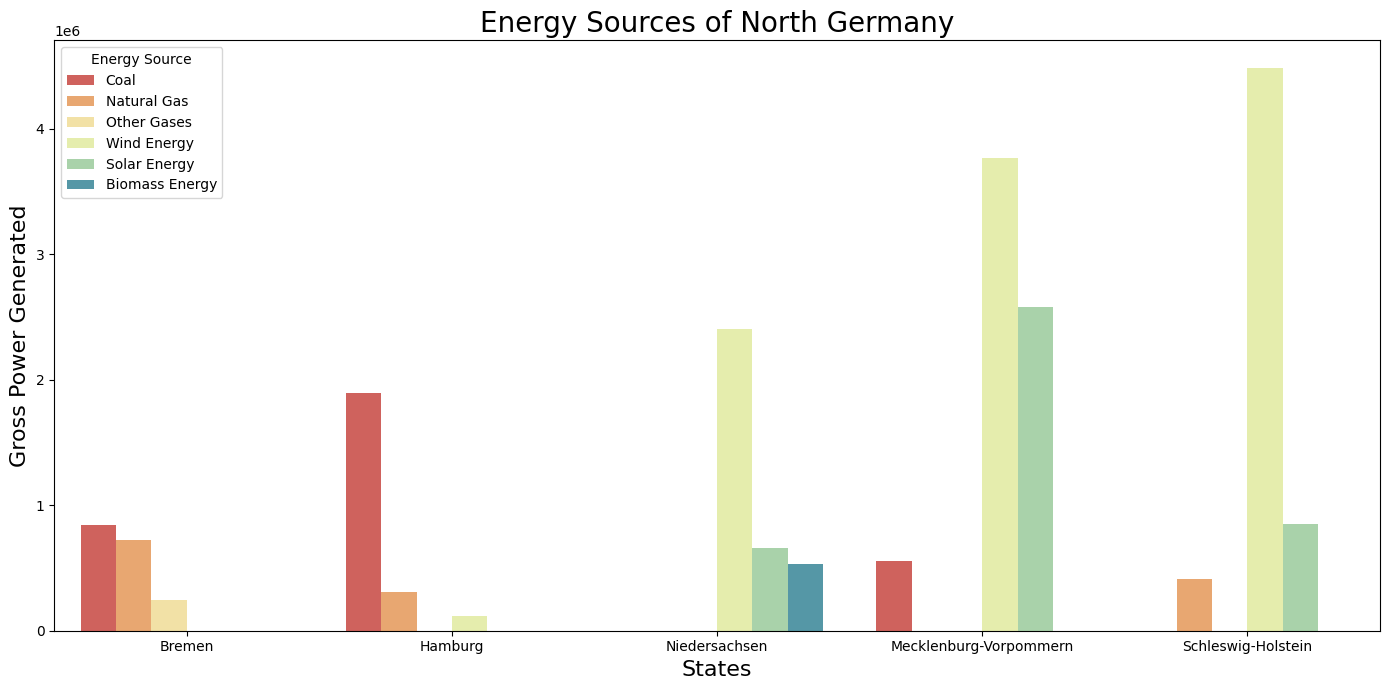

In [73]:
colors = sns.color_palette('Spectral')[0:10]
plt.figure(figsize=(14, 7))
ax = sns.barplot(data = gross_power, x = 'Federal State', y = 'Gross Power', hue = 'Energy Source', palette = colors)
plt.xlabel('States', fontsize = 16)
plt.ylabel('Gross Power Generated', fontsize = 16)
plt.title('Energy Sources of North Germany', fontsize = 20)
plt.tight_layout()
# plt.savefig('Energy Sources of North Germany', pad_inches = 0.1)
plt.show()

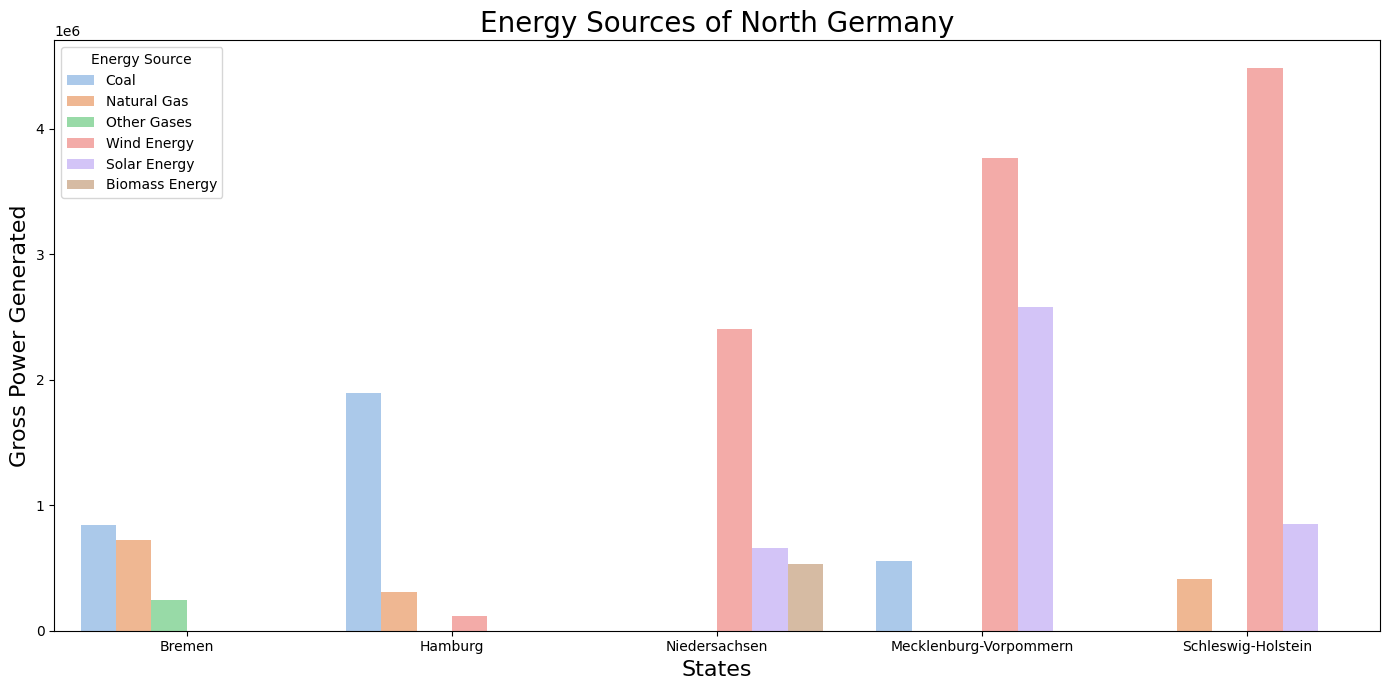

In [74]:
colors = sns.color_palette("pastel")[0:8]
plt.figure(figsize=(14, 7))
ax = sns.barplot(data = gross_power, x = 'Federal State', y = 'Gross Power', hue = 'Energy Source', palette = colors)
plt.xlabel('States', fontsize = 16)
plt.ylabel('Gross Power Generated', fontsize = 16)
plt.title('Energy Sources of North Germany', fontsize = 20)
plt.tight_layout()
plt.show()

## ii) Distribution of Energy Plants in North Germany

In [75]:
h['Energy source'].value_counts()

Solar Radiant Energy       7167
Storage                    2282
Natural Gas                 950
Petroleum Products          107
Wind Energy                  68
Biomass Energy               46
Other Gases                   5
Coal                          4
Warmth Energy                 3
Non-Biogenic Waster           3
Water Energy                  1
Sewage Sludge                 1
Pressure from Gas lines       1
Name: Energy source, dtype: int64

In [76]:
b['Energy source'].value_counts()

Solar Radiant Energy    3748
Storage                  904
Natural Gas              395
Wind Energy               94
Petroleum Products        42
Other Gases               14
Biomass Energy            13
Non-Biogenic Waster        8
Coal                       3
Water Energy               2
Warmth Energy              1
Name: Energy source, dtype: int64

In [77]:
n['Energy source'].value_counts()

Solar Radiant Energy    19418
Storage                  2202
Biomass Energy           1299
Wind Energy              1012
Natural Gas               911
Petroleum Products         67
Water Energy               57
Other Gases                34
Name: Energy source, dtype: int64

In [78]:
mv['Energy source'].value_counts()

Solar Radiant Energy    19836
Wind Energy              1920
Storage                  1737
Natural Gas               692
Biomass Energy            689
Petroleum Products         57
Other Gases                33
Water Energy               23
Warmth Energy               7
Non-Biogenic Waster         3
Sewage Sludge               2
Coal                        1
Name: Energy source, dtype: int64

In [79]:
sh['Energy source'].value_counts()

Solar Radiant Energy    19648
Wind Energy              1879
Storage                  1706
Natural Gas               962
Biomass Energy            694
Petroleum Products         51
Other Gases                49
Water Energy                6
Non-Biogenic Waster         2
Warmth Energy               2
Sewage Sludge               1
Name: Energy source, dtype: int64

In [80]:
data = {'Federal State': ['Bremen', 'Bremen', 'Bremen',
                          'Hamburg', 'Hamburg', 'Hamburg',
                          'Niedersachsen', 'Niedersachsen', 'Niedersachsen',
                          'Mecklenburg-Vorpommern', 'Mecklenburg-Vorpommern', 'Mecklenburg-Vorpommern',
                          'Schleswig-Holstein', 'Schleswig-Holstein', 'Schleswig-Holstein'], 
        'Energy Source': ['Solar Energy', 'Storage', 'Natural Gas',
                          'Solar Energy', 'Storage', 'Natural Gas',
                          'Solar Energy', 'Storage', 'Biomass Energy',
                          'Solar Energy', 'Wind Energy','Storage',
                          'Solar Energy', 'Wind Energy','Storage'],
        'Number of Plants': [3748, 904, 395,
                        7167, 2282, 950,
                        19418, 2202, 1299,
                        19836, 1920, 1737,
                        19648, 1879, 1706]}

energy_source = pd.DataFrame(data = data)
energy_source.head()

Federal State Energy Source  Number of Plants
0        Bremen  Solar Energy              3748
1        Bremen       Storage               904
2        Bremen   Natural Gas               395
3       Hamburg  Solar Energy              7167
4       Hamburg       Storage              2282

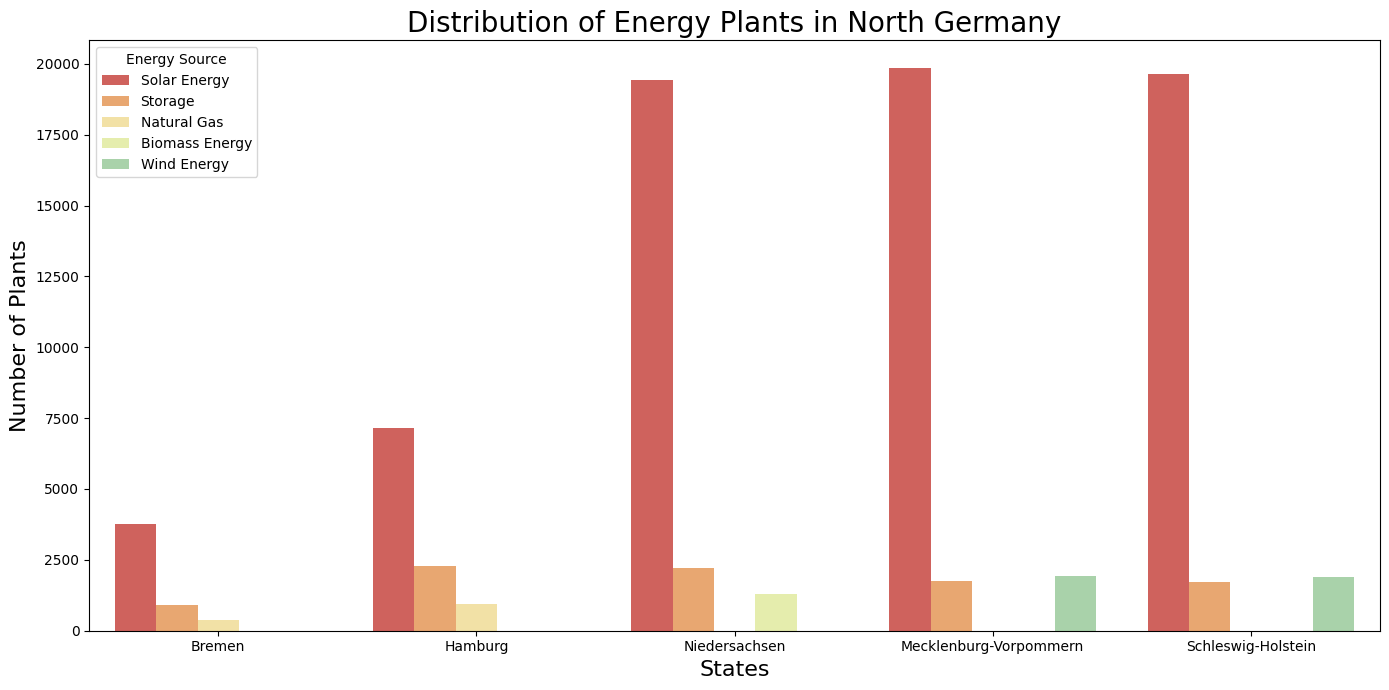

In [81]:
colors = sns.color_palette('Spectral')[0:10]
plt.figure(figsize=(14, 7))
ax = sns.barplot(data = energy_source, x = 'Federal State', y = 'Number of Plants', hue = 'Energy Source', palette = colors)
plt.xlabel('States', fontsize = 16)
plt.ylabel('Number of Plants', fontsize = 16)
plt.title('Distribution of Energy Plants in North Germany', fontsize = 20)
plt.tight_layout()
# plt.savefig('Distribution of Energy Plants', pad_inches = 0.1)
plt.show()

## iii) State-Wise Number of Solar Plant Installations

In [82]:
datan = pd.concat([b, h, n, mv, sh], axis = 0)
datan.shape

(90862, 50)

In [83]:
datas = datan[datan['Energy source'] == 'Solar Radiant Energy']
datas.shape

(69817, 50)

In [84]:
datas['Energy source'].unique()

array(['Solar Radiant Energy'], dtype=object)

In [85]:
datas.dtypes

Mastr no.the unit                              object
Display name of the unit                       object
Company status                                 object
Energy source                                  object
Gross performance of the unit                 float64
Net performance of the unit                   float64
Commissioning date of the unit                 object
Registration date of the unit                  object
Federal State                                  object
postal code                                   float64
Ort                                            object
street                                         object
House number                                   object
Chamber                                        object
Parcel                                         object
Municipal key                                 float64
Latitude                                       object
Longitude                                      object
Number of solar modules     

In [86]:
b, h, mv, n, sh = datas.groupby('Federal State')['Net performance of the unit'].count()

In [87]:
data = {'State': ['Bremen', 'Hamburg', 'Mecklenburg-Vorpommern', 'Niedersachsen', 'Schleswig-Holstein'],
        'No. of Solar Modules': [b, h, mv, n, sh]}

solarplant_data = pd.DataFrame(data = data)
solarplant_data.head()

State  No. of Solar Modules
0                  Bremen                  3748
1                 Hamburg                  7167
2  Mecklenburg-Vorpommern                 19836
3           Niedersachsen                 19418
4      Schleswig-Holstein                 19648

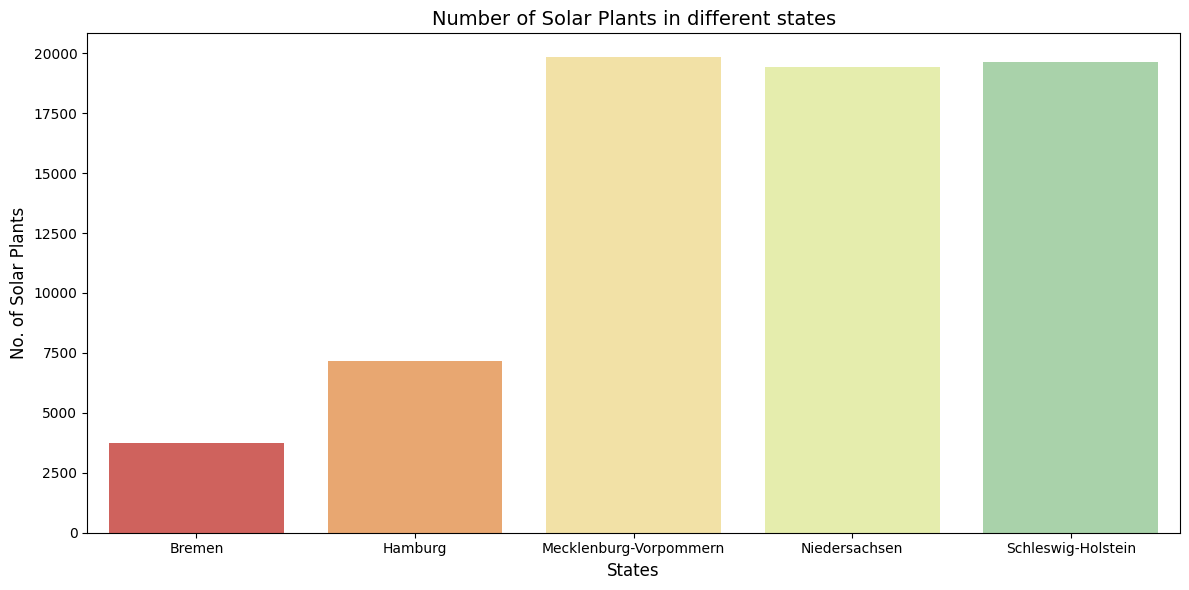

In [88]:
colors = sns.color_palette('Spectral')[0:10]
plt.figure(figsize=(12, 6))
ax = sns.barplot(data = solarplant_data, x = 'State', y = 'No. of Solar Modules', palette = colors)
plt.xlabel('States', fontsize = 12)
plt.ylabel('No. of Solar Plants', fontsize = 12)
plt.title('Number of Solar Plants in different states', fontsize = 14)
plt.tight_layout()
plt.savefig('Number of solar plants', pad_inches = 0.1)
plt.show()

# Section 4: Geospatial Analysis

In [89]:
# ! pip install geopandas
# ! pip install contextily

In [90]:
import geopandas as gpd
import contextily as cx

In [91]:
solar = freeland_data.copy()
solar.head()

Mastr no.the unit           Display name of the unit Company status  \
963    SEE996678348851                        Solarzellen     In Betrieb   
1530   SEE960053517019      Krannich Solarpark 14 Domsühl     In Betrieb   
1662   SEE986951443519  Freiflächen PV Anlage Honerdingen     In Betrieb   
1960   SEE953239725025      Krannich Solarpark 15 Niepars     In Betrieb   
2019   SEE926079243721      Krannich Solarpark 22 Malchin     In Betrieb   

             Energy source  Gross performance of the unit  \
963   Solar Radiant Energy                           4.59   
1530  Solar Radiant Energy                         999.68   
1662  Solar Radiant Energy                        2124.00   
1960  Solar Radiant Energy                        3982.26   
2019  Solar Radiant Energy                        2800.80   

      Net output of the unit Commissioning date of the unit  \
963                     4.00                     18/12/2015   
1530                  999.68                     13/12/2011   
1662                 2124.00                     30/06/2010   
1960                 3982.26                     15/12/2011   
2019                 2800.00                     27/09/2012   

     Registration date of the unit           Federal State Postal code  ...  \
963                     02/02/2019           Niedersachsen       21398  ...   
1530                    04/02/2019  Mecklenburg-Vorpommern       19374  ...   
1662                    04/02/2019           Niedersachsen       29664  ...   
1960                    04/02/2019  Mecklenburg-Vorpommern       18442  ...   
2019                    04/02/2019  Mecklenburg-Vorpommern       17139  ...   

     MASTR no.there location Mastr no.the EEG system  \
963          SEL969010708972         EEG972290138025   
1530         SEL970903259242         EEG940262015841   
1662         SEL973518201491         EEG940591177586   
1960         SEL955137329961         EEG928199160988   
2019         SEL997311604679         EEG978463567104   

                         EEG system key Commissioning date of the EEG system  \
963   E20088012139801000000000000007733                           18/12/2015   
1530  E43007010000000000000221206000001                           29/09/2011   
1662  E20312012966419000000104071300001                           30/06/2010   
1960  E4186001S120000000000034071500001                           15/12/2011   
2019  E4186001S120000000000038275100001                           27/09/2012   

     Installed capacity Surcharge number (EEG/KWK advertisement)  \
963                4,59                                      NaN   
1530             999,68                                      NaN   
1662               2124                                      NaN   
1960            3982,26                                      NaN   
2019             2800,8                                      NaN   

     Mastr no.the KWK system Commissioning date of the KWK system  \
963                      NaN                                  NaN   
1530                     NaN                                  NaN   
1662                     NaN                                  NaN   
1960                     NaN                                  NaN   
2019                     NaN                                  NaN   

     Electrical CHP power Thermal benefit in KW  
963                   NaN                   NaN  
1530                  NaN                   NaN  
1662                  NaN                   NaN  
1960                  NaN                   NaN  
2019                  NaN                   NaN  

[5 rows x 50 columns]

In [92]:
solar.dtypes

Mastr no.the unit                              object
Display name of the unit                       object
Company status                                 object
Energy source                                  object
Gross performance of the unit                 float64
Net output of the unit                        float64
Commissioning date of the unit                 object
Registration date of the unit                  object
Federal State                                  object
Postal code                                    object
Ort                                            object
Street                                         object
House number                                   object
Alcohol                                        object
Parade                                         object
Municipal key                                  object
Latitude                                       object
Longitude                                      object
Number of solar modules     

In [93]:
solar['Latitude'].replace(' ', np.nan, inplace = True)
solar['Longitude'].replace(' ', np.nan, inplace = True)
solar['Number of solar modules'].replace(' ', np.nan, inplace = True)

In [94]:
solar.dropna(subset = ['Latitude', 'Longitude', 'Number of solar modules'], axis = 0, inplace = True)

In [95]:
solar['Latitude'] = solar['Latitude'].apply(lambda x: replace_comma(x))
solar['Latitude'] = solar['Latitude'].astype(float)

In [96]:
solar['Longitude'] = solar['Longitude'].apply(lambda x: replace_comma(x))
solar['Longitude'] = solar['Longitude'].astype(float)

In [97]:
solar['Number of solar modules'] = solar['Number of solar modules'].astype(float)

In [98]:
gdf = gpd.GeoDataFrame(solar, geometry = gpd.points_from_xy(solar.Longitude, solar.Latitude), crs = "epsg:4326")

In [99]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

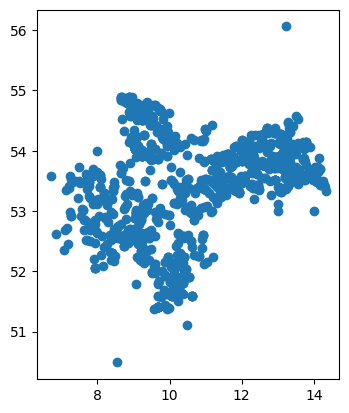

In [100]:
gdf.plot()

In [101]:
gdf = gdf.to_crs(epsg = 3857)

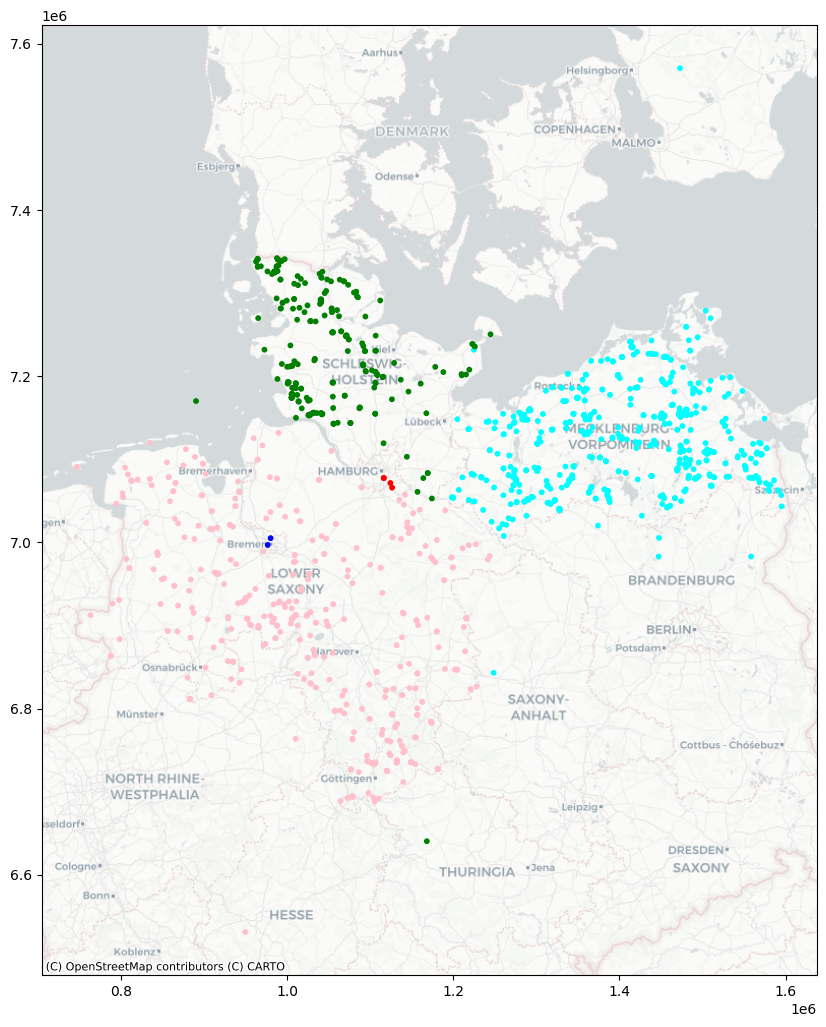

In [102]:
colors = {'Niedersachsen':'pink','Mecklenburg-Vorpommern':'cyan','Schleswig-Holstein':'green','Bremen':'blue','Hamburg':'red'}
gdf['color'] = gdf['Federal State'].map(colors)
ax = gdf.plot(markersize = 10, figsize = (10, 15), color = gdf['color'])
cx.add_basemap(ax, source = cx.providers.CartoDB.Positron)
plt.show()

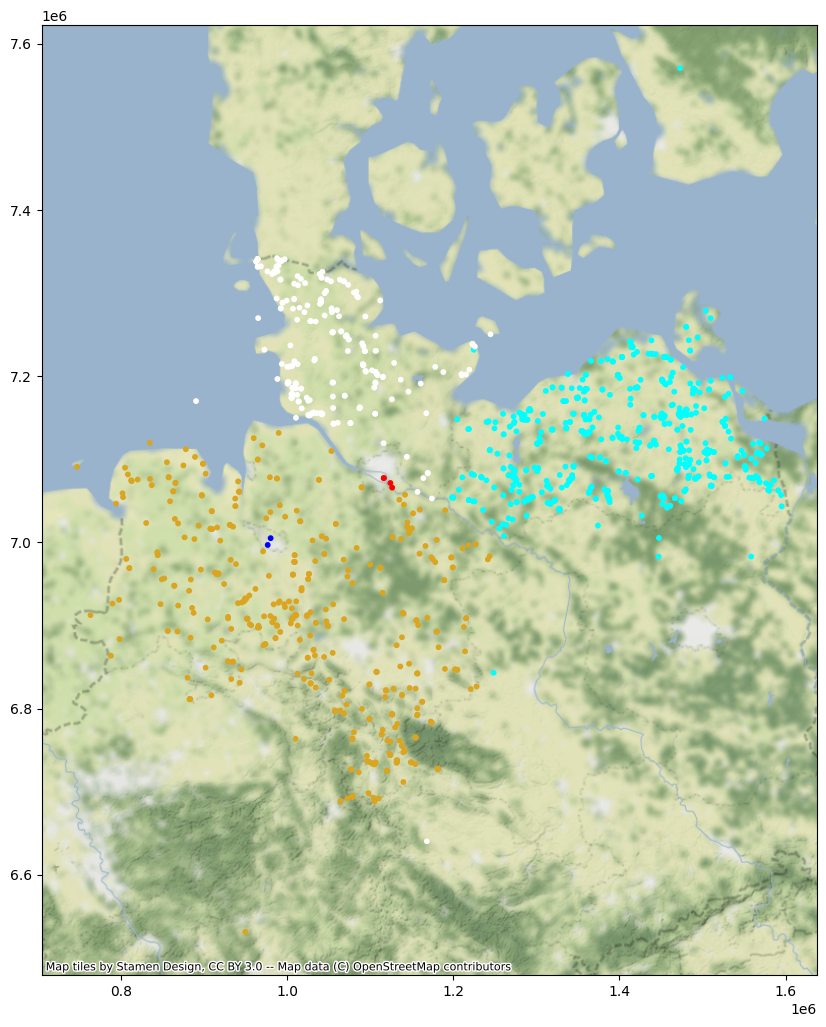

In [103]:
colors = {'Niedersachsen':'goldenrod','Mecklenburg-Vorpommern':'cyan','Schleswig-Holstein':'white','Bremen':'blue','Hamburg':'red'}
gdf['color'] = gdf['Federal State'].map(colors)
ax = gdf.plot(markersize = 10, figsize = (10, 15), color = gdf['color'])
cx.add_basemap(ax, source = cx.providers.Stamen.TerrainBackground)
plt.show()

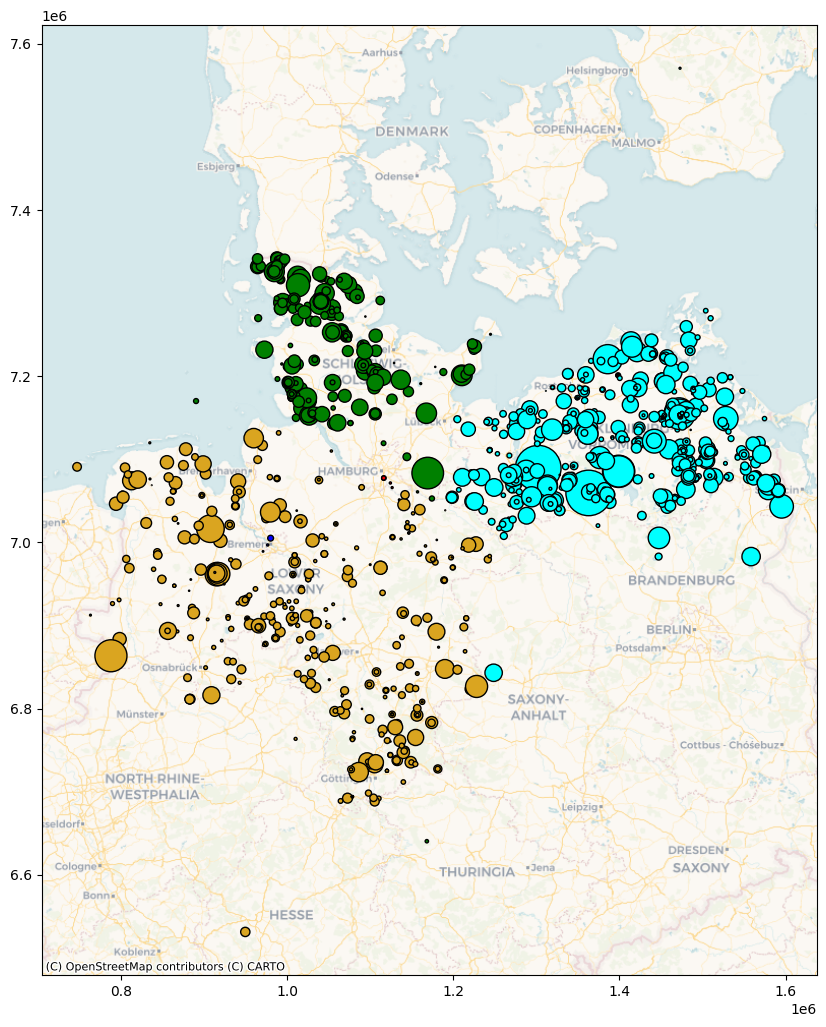

In [104]:
colors = {'Niedersachsen':'goldenrod','Mecklenburg-Vorpommern':'cyan','Schleswig-Holstein':'green','Bremen':'blue','Hamburg':'red'}
gdf['color'] = gdf['Federal State'].map(colors)
ax = gdf.plot(markersize = gdf['Number of solar modules']/200, edgecolors = 'black', figsize = (10, 15), color = gdf['color'])
cx.add_basemap(ax, source = cx.providers.CartoDB.VoyagerLabelsUnder)
plt.show()

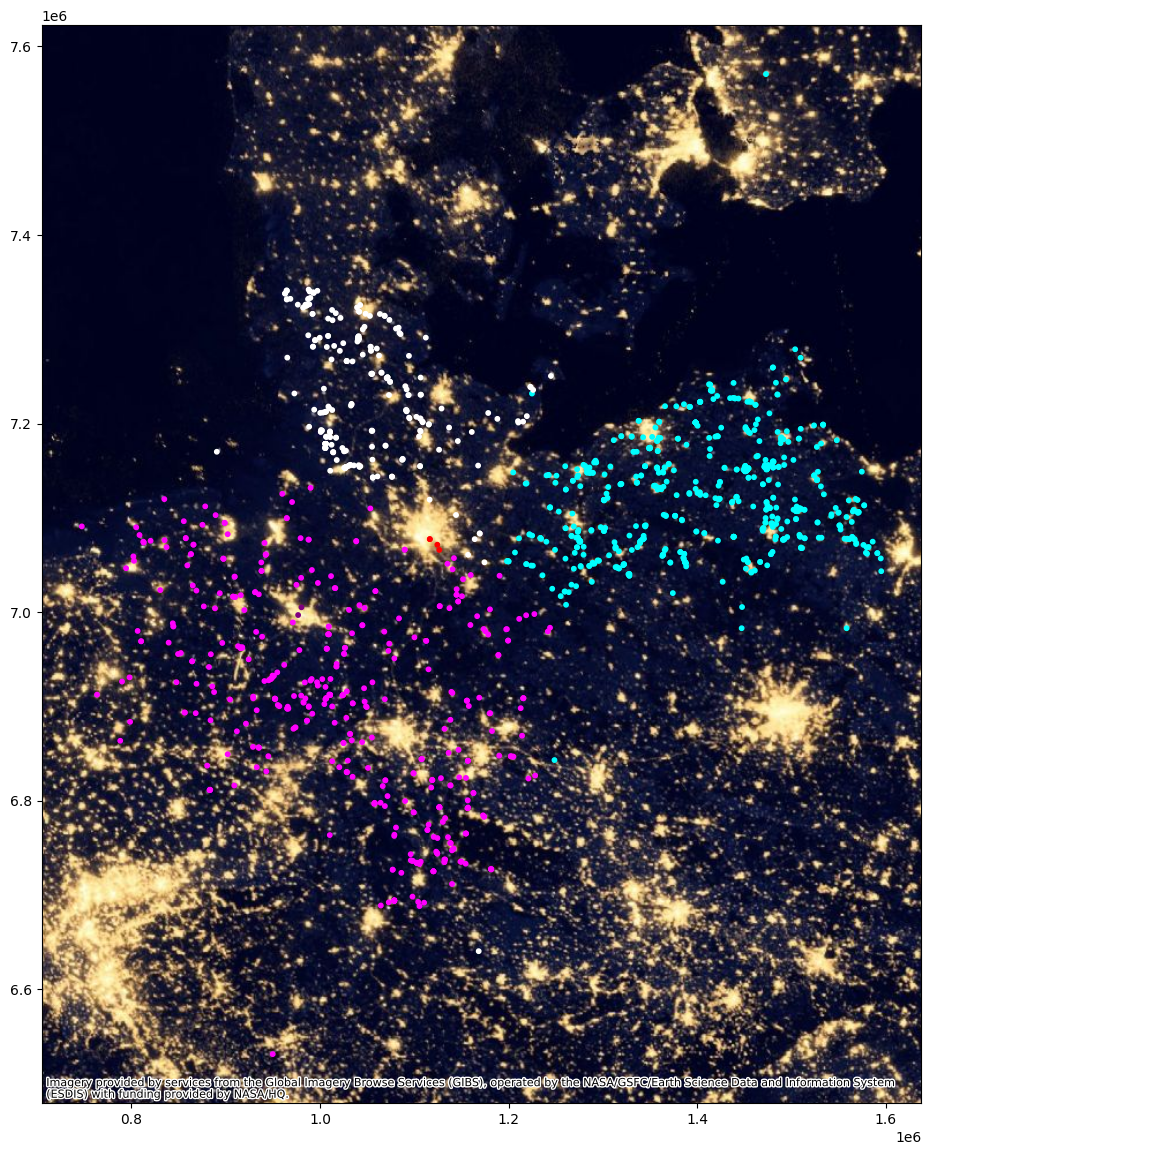

In [105]:
colors = {'Niedersachsen':'fuchsia','Mecklenburg-Vorpommern':'cyan','Schleswig-Holstein':'white','Bremen':'purple','Hamburg':'red'}
gdf['color'] = gdf['Federal State'].map(colors)
ax = gdf.plot(markersize = 10, figsize = (15, 14), color = gdf['color'])
cx.add_basemap(ax, source = cx.providers.NASAGIBS.ViirsEarthAtNight2012)
plt.show()

# Section 5: Tax Data Analysis

In [106]:
# ! pip install openpyxl

In [107]:
xls = pd.ExcelFile('tax.xlsx')

tax_bremen = pd.read_excel(xls, 'bremen')
tax_hamburg = pd.read_excel(xls, 'hamburg')
tax_mv = pd.read_excel(xls, 'meck_vor')
tax_n = pd.read_excel(xls, 'nieder')
tax_sh = pd.read_excel(xls, 'schles_hol')

In [108]:
tax_bremen.head()

Gemeindebezeichnung  GewSt  GrStB  year
0              Bremen    470    695  2019
1         Bremerhaven    460    645  2019
2              Bremen    460    695  2020
3         Bremerhaven    460    645  2020

In [109]:
tax_hamburg.head()

Gemeindebezeichnung  GewSt  GrStB  year
0  Hamburg, Freie und Hansestadt    470    540  2019
1  Hamburg, Freie und Hansestadt    470    540  2020

In [110]:
tax_mv.head()

Gemeindebezeichnung  GewSt  GrStB  year  Unnamed: 4
0  Greifswald, Hansestadt    425    480  2019         NaN
1                 Güstrow    340    400  2019     18273.0
2          Neubrandenburg    440    550  2019         NaN
3             Neustrelitz    400    400  2019         NaN
4     Rostock, Hansestadt    465    480  2019         NaN

In [111]:
tax_bremen['State'] = 'Bremen'
tax_bremen.head()

Gemeindebezeichnung  GewSt  GrStB  year   State
0              Bremen    470    695  2019  Bremen
1         Bremerhaven    460    645  2019  Bremen
2              Bremen    460    695  2020  Bremen
3         Bremerhaven    460    645  2020  Bremen

In [112]:
tax_mv['State'] = 'Mecklenburg-Vorpommern'
tax_n['State'] = 'Niedersachsen'
tax_sh['State'] = 'Schleswig-Holstein'

In [113]:
tax_data = pd.concat([tax_mv, tax_n, tax_sh], axis = 0)
tax_data.drop(labels = ['Unnamed: 4'], axis = 1, inplace = True)
tax_data.shape

(244, 5)

In [114]:
tax_data.head()

Gemeindebezeichnung  GewSt  GrStB  year                   State
0  Greifswald, Hansestadt    425    480  2019  Mecklenburg-Vorpommern
1                 Güstrow    340    400  2019  Mecklenburg-Vorpommern
2          Neubrandenburg    440    550  2019  Mecklenburg-Vorpommern
3             Neustrelitz    400    400  2019  Mecklenburg-Vorpommern
4     Rostock, Hansestadt    465    480  2019  Mecklenburg-Vorpommern

In [115]:
tax_data_20 = tax_data[tax_data['year'] == 2020]
tax_data_20.shape

(122, 5)

In [116]:
means_tax = tax_data_20.groupby('State')['GewSt'].mean()
means_taxb = tax_data_20.groupby('State')['GrStB'].mean()

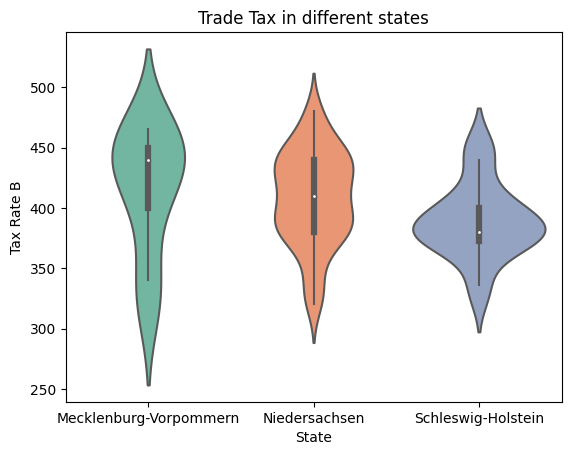

In [117]:
colors = colors = sns.color_palette('Set2')[0:3]
ax = sns.violinplot(data = tax_data_20, x = "State", y = "GewSt", palette = colors)
plt.xlabel('State', fontsize = 10)
plt.ylabel('Tax Rate B', fontsize = 10)
plt.title('Trade Tax in different states', fontsize = 12)
plt.show()

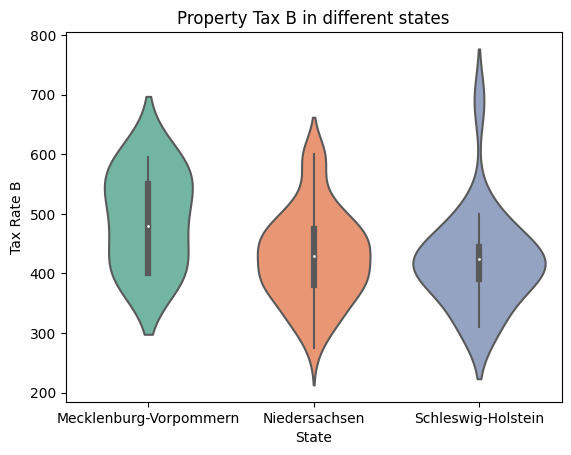

In [118]:
colors = colors = sns.color_palette('Set2')[0:3]
ax = sns.violinplot(data = tax_data_20, x = "State", y = "GrStB", palette = colors)
plt.xlabel('State', fontsize = 10)
plt.ylabel('Tax Rate B', fontsize = 10)
plt.title('Property Tax B in different states', fontsize = 12)
plt.show()